In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/dataset_traffic_accident_prediction1.csv")

# Remove duplicates
df = df.drop_duplicates()
df

# Fill missing values for categorical columns
cat_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition',
            'Vehicle_Type', 'Accident_Severity', 'Road_Light_Condition']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values for numerical columns
num_cols = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
            'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
df

# Fix unrealistic speed limits
df.loc[df['Speed_Limit'] > 150, 'Speed_Limit'] = 150
df

# Convert numeric columns into correct datatypes
df['Accident'] = df['Accident'].astype(int)
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].astype(int)
df['Driver_Age'] = df['Driver_Age'].astype(int)
df['Driver_Alcohol'] = df['Driver_Alcohol'].astype(int)
df

# Reset index
df = df.reset_index(drop=True)
df.to_csv("Cleaned_Accidents.csv", index=False)

df


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5,0,Low,Wet,Car,51,48.0,Artificial Light,0
1,Clear,Rural Road,Night,1.0,120.0,3,0,Moderate,Wet,Truck,49,43.0,Artificial Light,0
2,Rainy,Highway,Evening,1.0,60.0,4,0,Low,Icy,Car,54,52.0,Artificial Light,0
3,Clear,City Road,Afternoon,2.0,60.0,3,0,Low,Under Construction,Bus,34,31.0,Daylight,0
4,Rainy,Highway,Morning,1.0,150.0,11,0,Low,Dry,Car,62,55.0,Artificial Light,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,Clear,Highway,Night,2.0,30.0,4,0,Low,Dry,Car,23,15.0,Daylight,0
822,Rainy,Rural Road,Evening,2.0,60.0,4,0,Low,Dry,Motorcycle,52,46.0,Daylight,1
823,Foggy,Highway,Evening,1.0,30.0,4,1,High,Dry,Car,43,34.0,Artificial Light,0
824,Foggy,Highway,Afternoon,2.0,60.0,3,0,Low,Dry,Car,25,19.0,Artificial Light,0


Shape of dataset: (826, 14)

Column names:
 ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience', 'Road_Light_Condition', 'Accident']

Data Types:
 Weather                  object
Road_Type                object
Time_of_Day              object
Traffic_Density         float64
Speed_Limit             float64
Number_of_Vehicles        int64
Driver_Alcohol            int64
Accident_Severity        object
Road_Condition           object
Vehicle_Type             object
Driver_Age                int64
Driver_Experience       float64
Road_Light_Condition     object
Accident                  int64
dtype: object

Missing Values:
 Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition

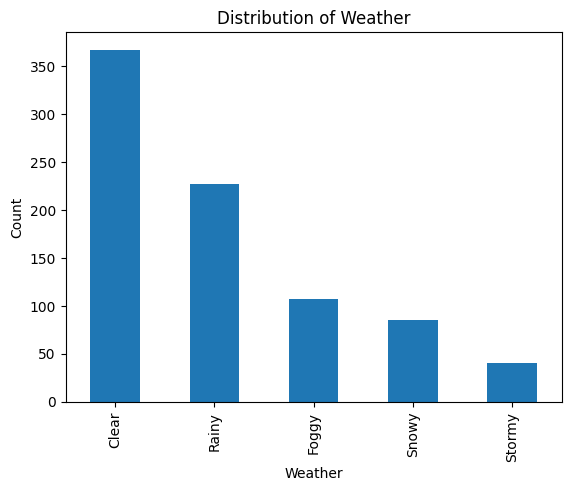


Value counts for Road_Type:
 Road_Type
Highway          437
City Road        226
Rural Road       122
Mountain Road     41
Name: count, dtype: int64


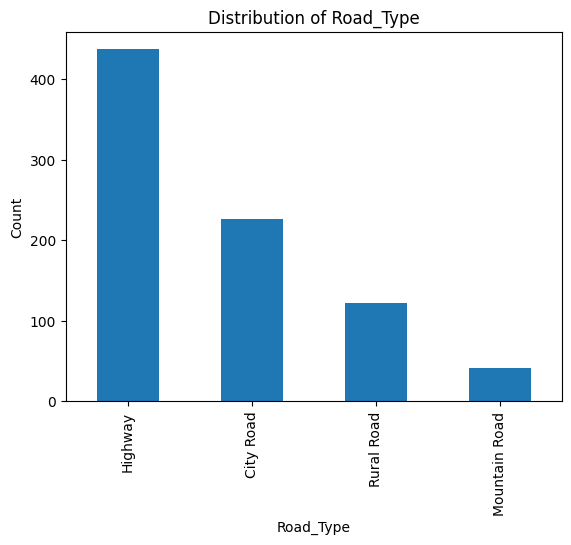


Value counts for Time_of_Day:
 Time_of_Day
Afternoon    309
Evening      214
Morning      196
Night        107
Name: count, dtype: int64


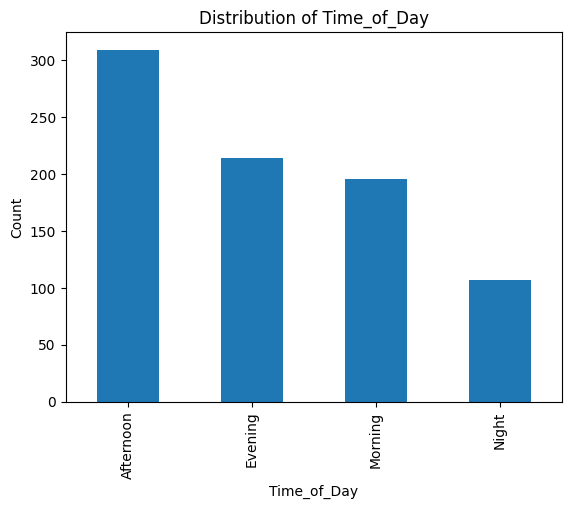


Value counts for Road_Condition:
 Road_Condition
Dry                   435
Wet                   151
Icy                   151
Under Construction     89
Name: count, dtype: int64


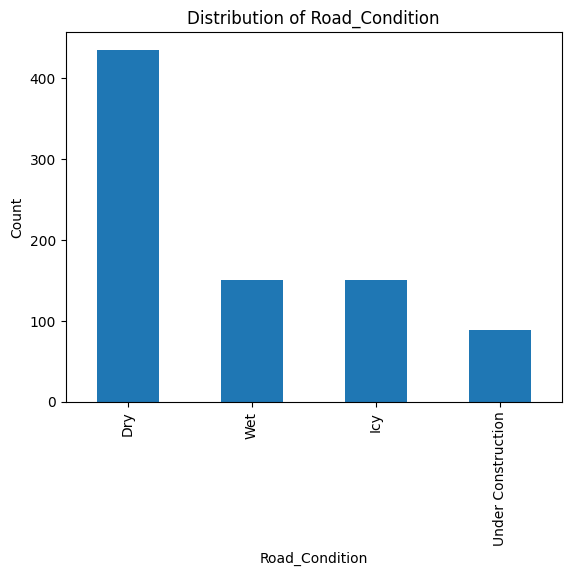


Value counts for Vehicle_Type:
 Vehicle_Type
Car           619
Truck          97
Motorcycle     86
Bus            24
Name: count, dtype: int64


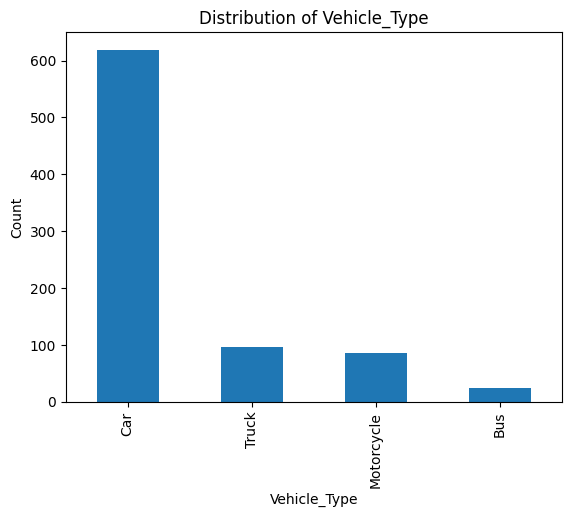


Value counts for Accident_Severity:
 Accident_Severity
Low         509
Moderate    238
High         79
Name: count, dtype: int64


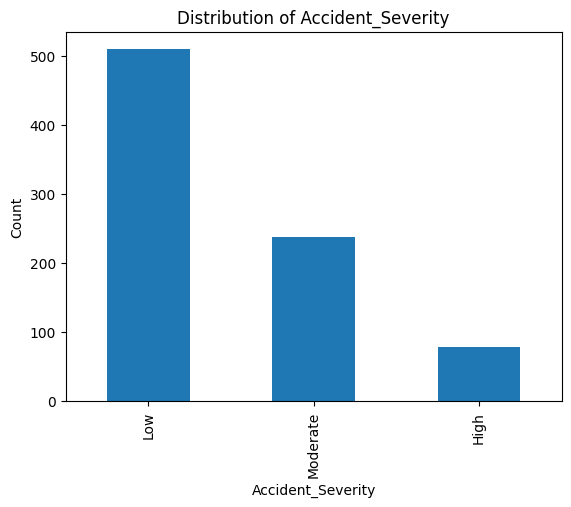


Value counts for Road_Light_Condition:
 Road_Light_Condition
Artificial Light    440
Daylight            311
No Light             75
Name: count, dtype: int64


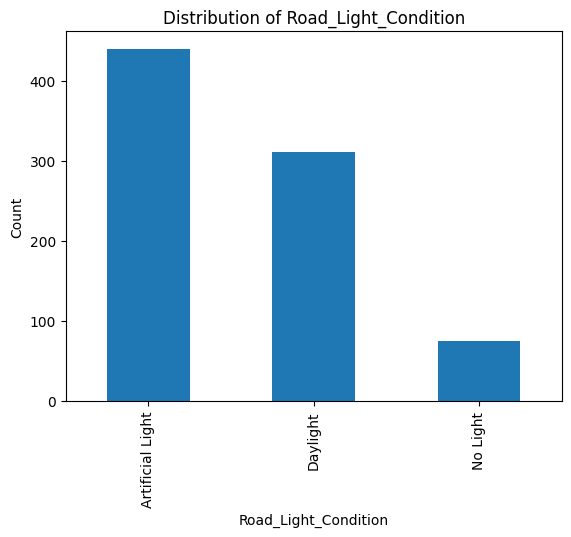

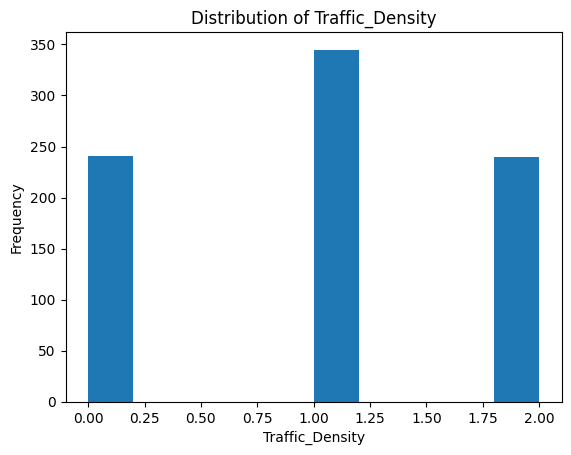

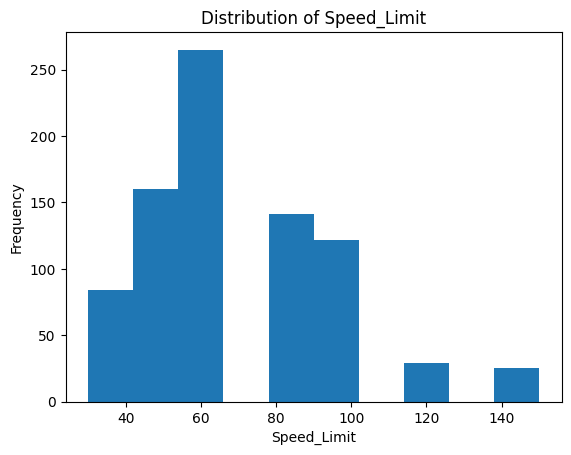

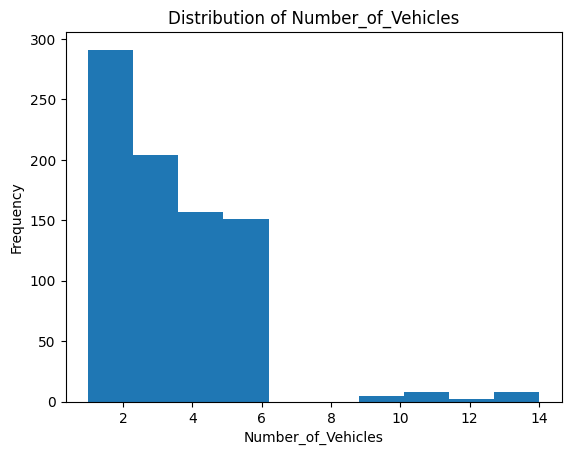

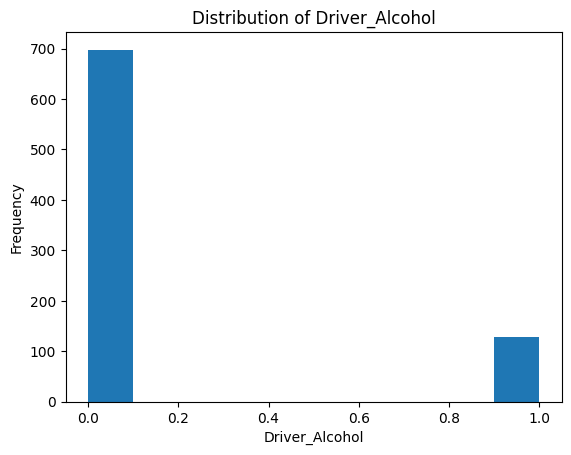

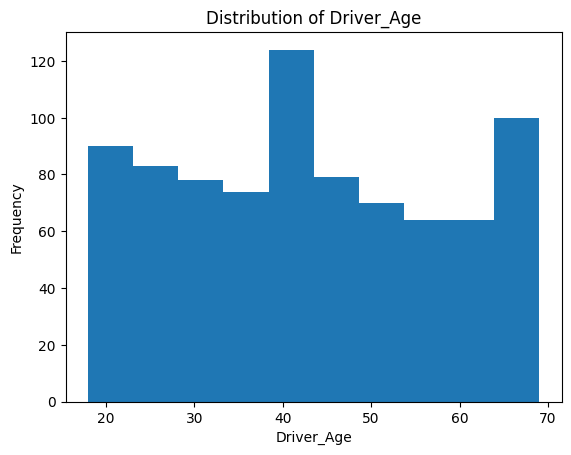

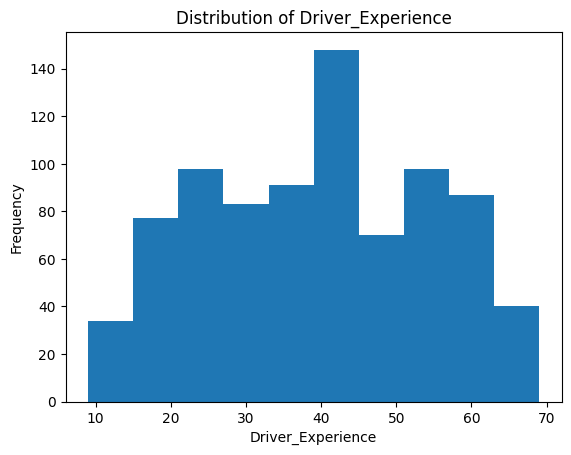


Correlation Matrix:
                     Traffic_Density  Speed_Limit  Number_of_Vehicles  \
Traffic_Density            1.000000    -0.041933           -0.033552   
Speed_Limit               -0.041933     1.000000            0.375159   
Number_of_Vehicles        -0.033552     0.375159            1.000000   
Driver_Alcohol            -0.021241    -0.026885           -0.017520   
Driver_Age                -0.009892    -0.004307            0.026237   
Driver_Experience         -0.001611    -0.004951            0.022612   
Accident                   0.000997    -0.030858            0.040051   

                    Driver_Alcohol  Driver_Age  Driver_Experience  Accident  
Traffic_Density          -0.021241   -0.009892          -0.001611  0.000997  
Speed_Limit              -0.026885   -0.004307          -0.004951 -0.030858  
Number_of_Vehicles       -0.017520    0.026237           0.022612  0.040051  
Driver_Alcohol            1.000000    0.025753           0.026654  0.012908  
Driver_Age 

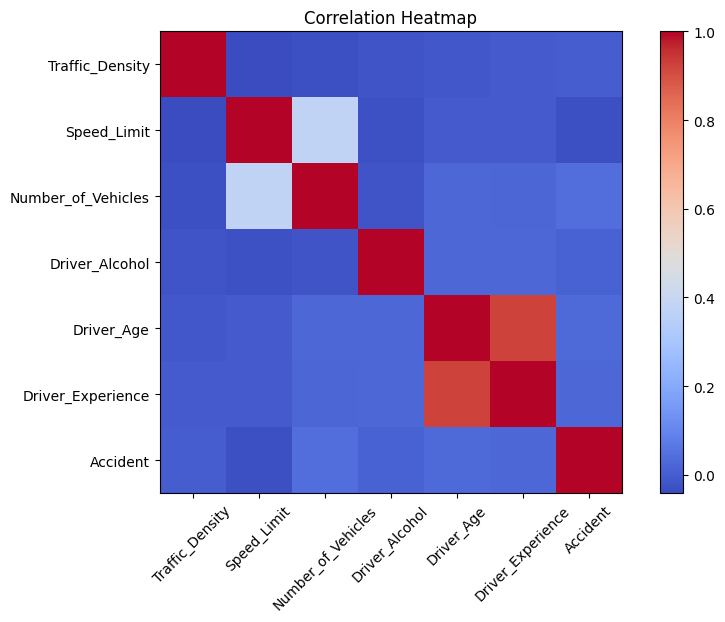

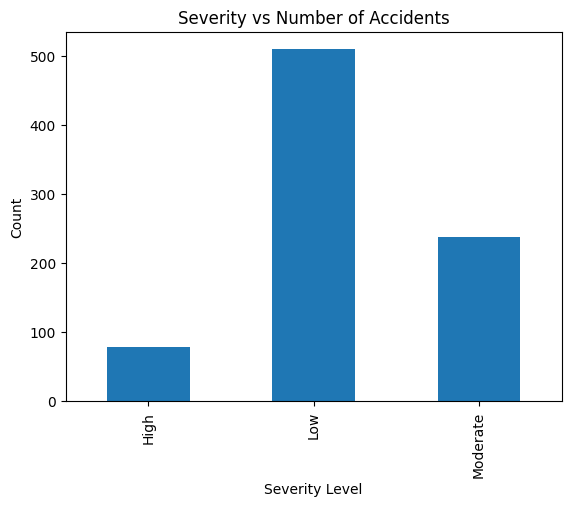

In [13]:
# EDA

# Display full columns
pd.set_option('display.max_columns', None)

# Load your cleaned dataset
df = pd.read_csv("Cleaned_Accidents.csv")

#  Basic Information
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

print("\nStatistical Summary:\n", df.describe())

#  Categorical Feature Analysis
cat_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition',
            'Vehicle_Type', 'Accident_Severity', 'Road_Light_Condition']

for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#  Numerical Feature Analysis
num_cols = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
            'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']

for col in num_cols:
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation Plot
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Accident Severity vs Other Features
plt.figure()
df.groupby('Accident_Severity')['Accident'].count().plot(kind='bar')
plt.title("Severity vs Number of Accidents")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()



In [19]:
# FEATURE ENCODING AND SCALING
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create Encoder + Scaler
label_enc = LabelEncoder()
scaler = StandardScaler()

# Encode Categorical Columns
cat_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition',
            'Vehicle_Type', 'Accident_Severity', 'Road_Light_Condition']

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

#  Scale Numerical Columns
num_cols = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
            'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']

df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature Encoding & Transformation Completed Successfully ")
print(df.head())


Feature Encoding & Transformation Completed Successfully 
   Weather  Road_Type  Time_of_Day  Traffic_Density  Speed_Limit  \
0        2          0            2         0.001586     1.162932   
1        0          3            3         0.001586     1.917216   
2        2          1            1         0.001586    -0.345638   
3        0          0            0         1.312029    -0.345638   
4        2          1            2         0.001586     3.048643   

   Number_of_Vehicles  Driver_Alcohol  Accident_Severity  Road_Condition  \
0            0.873826        -0.42823                  1               3   
1           -0.139910        -0.42823                  2               3   
2            0.366958        -0.42823                  1               1   
3           -0.139910        -0.42823                  1               2   
4            3.915036        -0.42823                  1               0   

   Vehicle_Type  Driver_Age  Driver_Experience  Road_Light_Condition  Accide

In [24]:
# FEATURE SELECTION
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop('Accident', axis=1)  # Features
y = df['Accident']              # Target

selector = SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X, y)

selected_columns = X.columns[selector.get_support()]

print("\n Selected Best Features for Prediction:")
print(list(selected_columns))



 Selected Best Features for Prediction:
['Weather', 'Speed_Limit', 'Driver_Alcohol', 'Road_Condition', 'Vehicle_Type']


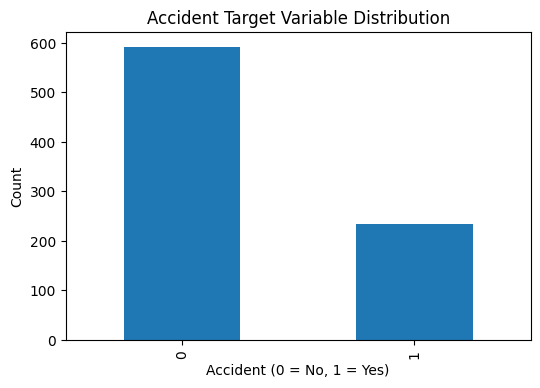

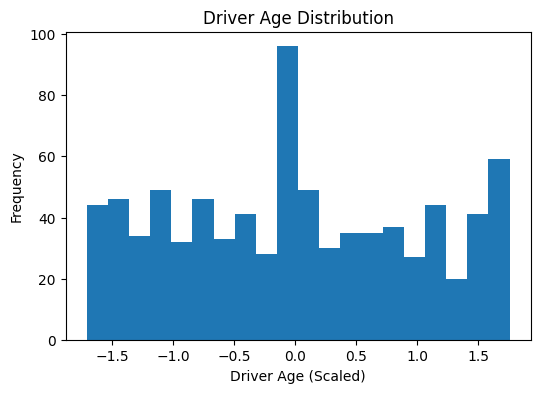

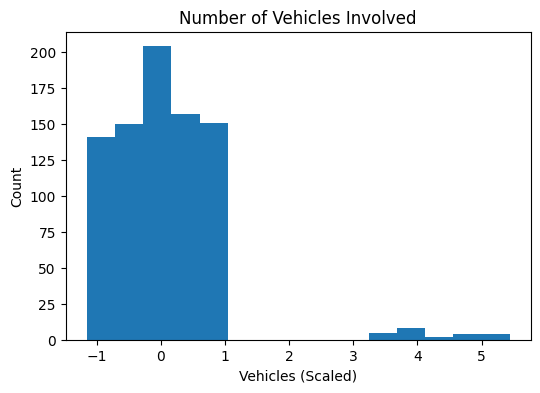

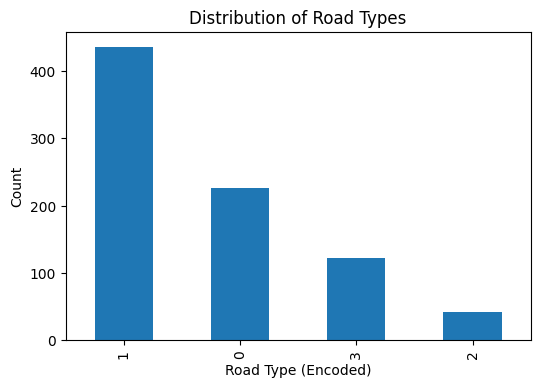

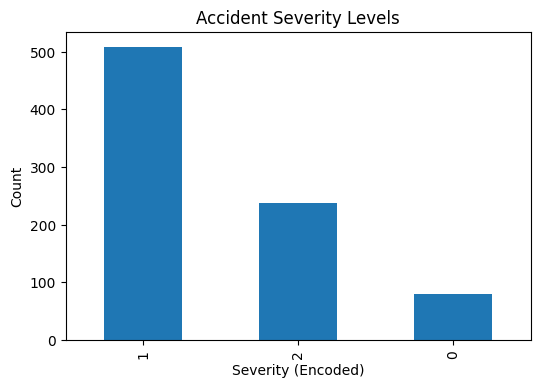

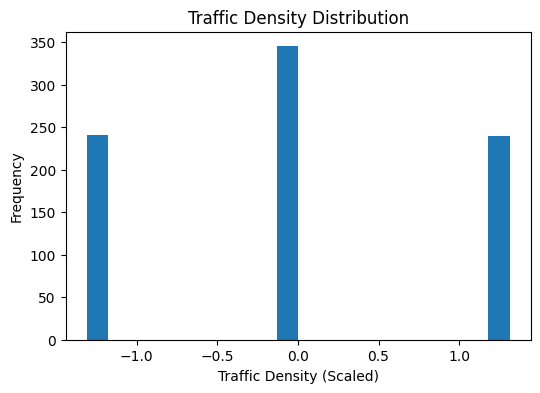

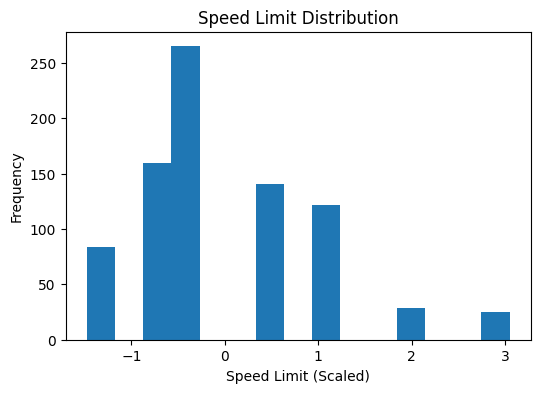

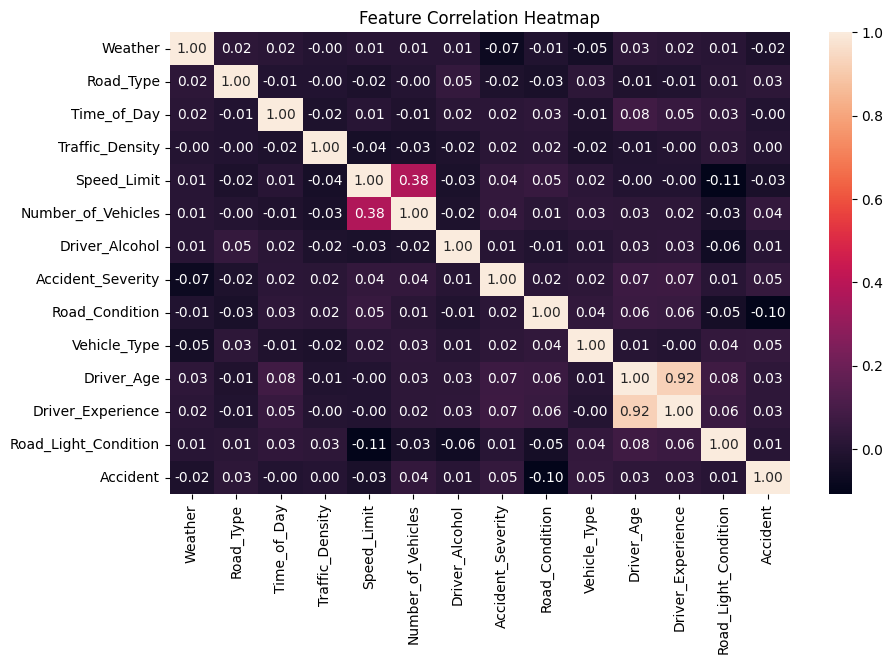

In [27]:
# 🔹 Distribution of Target Variable (Accident)
plt.figure(figsize=(6,4))
df['Accident'].value_counts().plot(kind='bar')
plt.title("Accident Target Variable Distribution")
plt.xlabel("Accident (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 🔹 Histogram of Driver Age
plt.figure(figsize=(6,4))
plt.hist(df['Driver_Age'], bins=20)
plt.title("Driver Age Distribution")
plt.xlabel("Driver Age (Scaled)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Histogram of Number of Vehicles
plt.figure(figsize=(6,4))
plt.hist(df['Number_of_Vehicles'], bins=15)
plt.title("Number of Vehicles Involved")
plt.xlabel("Vehicles (Scaled)")
plt.ylabel("Count")
plt.show()


# 🔹 Road Type Count
plt.figure(figsize=(6,4))
df['Road_Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Road Types")
plt.xlabel("Road Type (Encoded)")
plt.ylabel("Count")
plt.show()

# 🔹 Accident Severity Count
plt.figure(figsize=(6,4))
df['Accident_Severity'].value_counts().plot(kind='bar')
plt.title("Accident Severity Levels")
plt.xlabel("Severity (Encoded)")
plt.ylabel("Count")
plt.show()

# 🔹 Traffic Density Distribution
plt.figure(figsize=(6,4))
plt.hist(df['Traffic_Density'], bins=20)
plt.title("Traffic Density Distribution")
plt.xlabel("Traffic Density (Scaled)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Speed Limit Spread
plt.figure(figsize=(6,4))
plt.hist(df['Speed_Limit'], bins=15)
plt.title("Speed Limit Distribution")
plt.xlabel("Speed Limit (Scaled)")
plt.ylabel("Frequency")
plt.show()

# correlation map

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


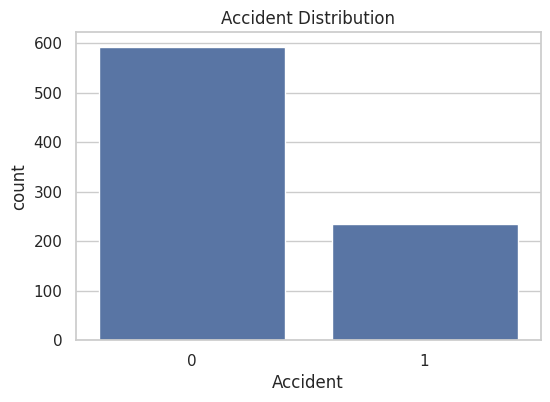

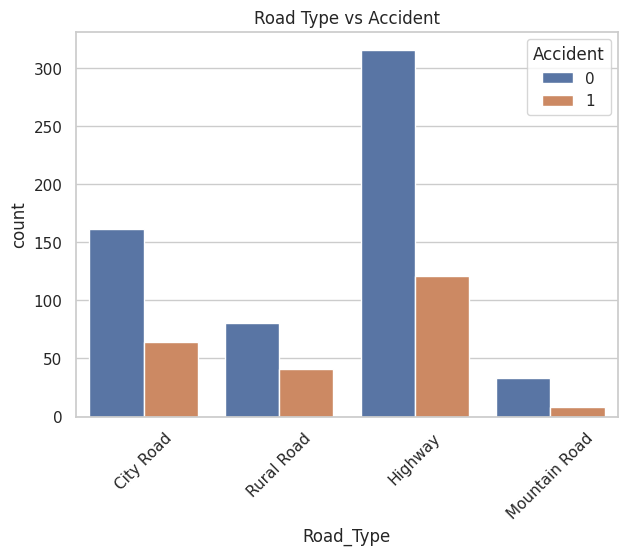

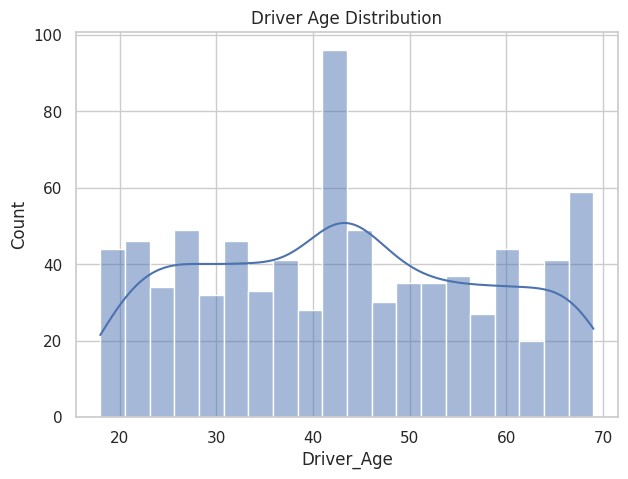

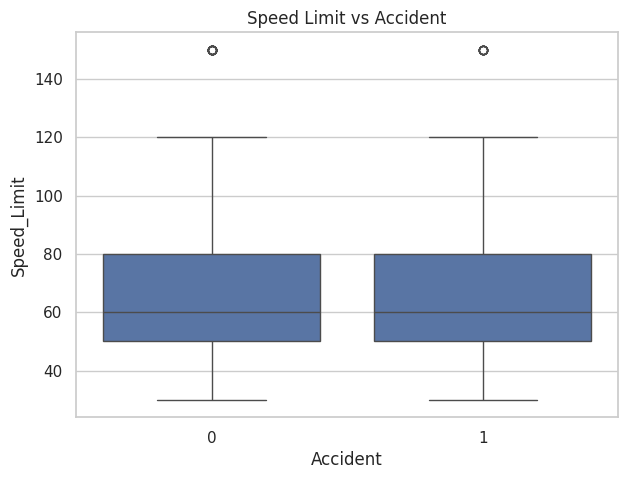

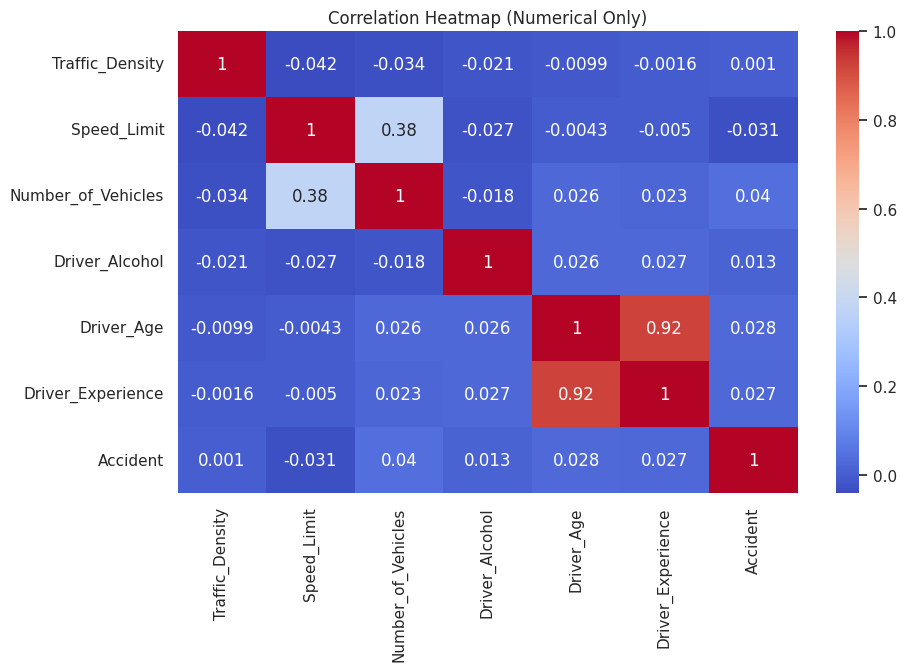

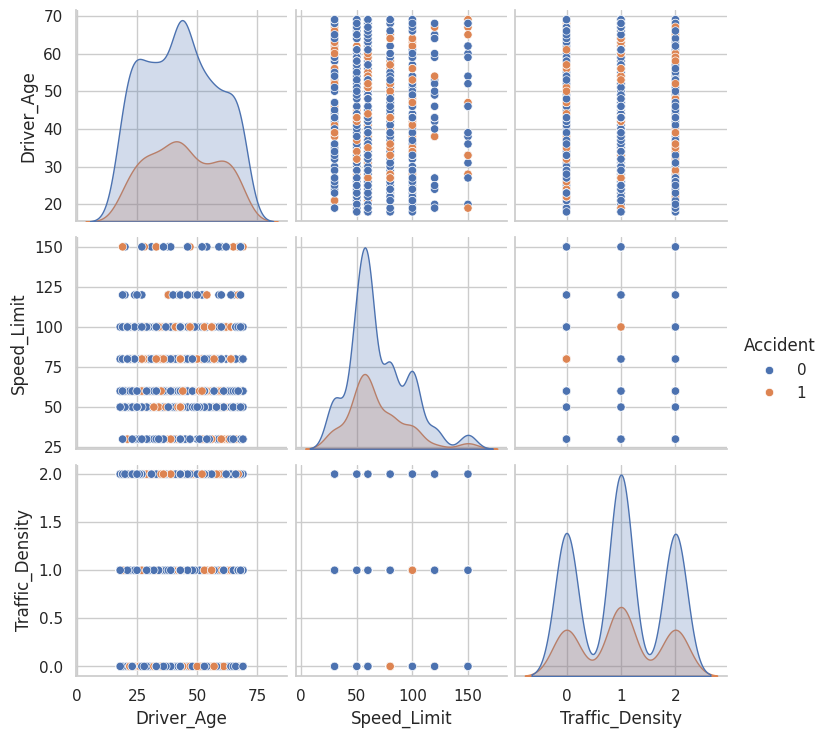

In [29]:
sns.set(style="whitegrid")
df = pd.read_csv("Cleaned_Accidents.csv")

# Accident Count
plt.figure(figsize=(6,4))
sns.countplot(x='Accident', data=df)
plt.title("Accident Distribution")
plt.show()

# Road Type vs Accident
plt.figure(figsize=(7,5))
sns.countplot(x='Road_Type', hue='Accident', data=df)
plt.title("Road Type vs Accident")
plt.xticks(rotation=45)
plt.show()

# Driver Age Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['Driver_Age'], kde=True, bins=20)
plt.title("Driver Age Distribution")
plt.show()

# Speed Limit vs Accident
plt.figure(figsize=(7,5))
sns.boxplot(x="Accident", y="Speed_Limit", data=df)
plt.title("Speed Limit vs Accident")
plt.show()

# Correlation Heatmap for Numerical Features Only
num_cols = ['Traffic_Density','Speed_Limit','Number_of_Vehicles',
            'Driver_Alcohol','Driver_Age','Driver_Experience','Accident']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Only)")
plt.show()

# Pairplot (smaller subset)
sns.pairplot(df[['Accident','Driver_Age','Speed_Limit','Traffic_Density']], hue='Accident')
plt.show()